<a href="https://colab.research.google.com/github/aljoharas/datascience/blob/main/spotifyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [2]:
%env SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
%env SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


env: SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
env: SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


In [3]:
!pip install spotipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.2/354.2 kB 6.5 MB/s eta 0:00:00


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
#hide our api key for safety
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)


In [5]:
import os
import requests


csv_urls = [
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ae-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-au-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-br-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-by-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ch-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-eg-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-gb-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-global-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-hk-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-in-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-it-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-jp-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-kr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-sa-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-th-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tw-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-us-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-uy-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ve-weekly-2025-08-07.csv",
]

for url in csv_urls:
    filename = os.path.join("/content", url.split("/")[-1])
    if not os.path.exists(filename):
        r = requests.get(url)
        if r.status_code == 200:
            with open(filename, "wb") as f:
                f.write(r.content)
        else:
            print(f"Failed to download {url} — status code {r.status_code}")

import glob
chart_files = glob.glob("/content/regional-*.csv")
print(f"Found {len(chart_files)} chart files")

Found 20 chart files


In [6]:
import time
import pandas as pd # Import pandas here
for f in chart_files:
    df = pd.read_csv(f)
    print(f"{f}: columns = {df.columns.tolist()}")

#filter out directories
chart_files = [f for f in chart_files if os.path.isfile(f)]

print(f"Found {len(chart_files)} CSV files")


dfs = [pd.read_csv(f) for f in chart_files]
all_artists = pd.concat([df['artist_names'] for df in dfs]).unique()

print(f"Total unique artists across all charts: {len(all_artists)}")

/content/regional-it-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-by-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-hk-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-uy-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-ae-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-th-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart

In [7]:
import time
from spotipy.exceptions import SpotifyException
import requests
from requests.exceptions import ReadTimeout
import pandas as pd

artist_data = []
seen_ids = set()

for artist_name in all_artists:
    try:
        result = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
        if result['artists']['items']:
            a = result['artists']['items'][0]
            # skip if no genres or already seen
            if not a['genres'] or a['id'] in seen_ids:
                continue
            artist_data.append({
                "name": a['name'],
                "id": a['id'],
                "genres": a['genres'],
                "popularity": a['popularity']
            })
            seen_ids.add(a['id'])

        time.sleep(0.5)
    except (requests.exceptions.ConnectionError, SpotifyException, ReadTimeout) as e:
        print(f"Error fetching {artist_name}: {e}. Retrying in 5 seconds...")
        time.sleep(5)
        continue

#creating the dataframe
df_artists = pd.DataFrame(artist_data)


# Check for missing values
print("Missing values per column:\n", df_artists.isnull().sum())

# Drop duplicates based on artist ID
df_artists.drop_duplicates(subset='id', inplace=True)

# Convert genres list to comma-separated string for readability
df_artists['genres_str'] = df_artists['genres'].apply(lambda x: ', '.join(x))

# Confirm datatypes
print("\nData types after cleaning:\n", df_artists.dtypes)


print(f"Final dataset: {len(df_artists)} artists with non-empty genres")
display(df_artists)
output_path = "spotify_artists_cleaned.csv"
df_artists.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"CSV file saved successfully as '{output_path}'")




Missing values per column:
 name          0
id            0
genres        0
popularity    0
dtype: int64

Data types after cleaning:
 name          object
id            object
genres        object
popularity     int64
genres_str    object
dtype: object
Final dataset: 708 artists with non-empty genres


,name,id,genres,popularity,genres_str
0,Achille Lauro,0lI3rF4hi4op6UxqlLHPzv,[italian trap],66,italian trap
1,Artie 5ive,2R4kNOwHUUsuDYhKsESVbF,[italian trap],72,italian trap
2,Doble ONE Flow Letal,25OaNybC8G6g5KkAmthQtX,[mexican hip hop],61,mexican hip hop
3,Luchè,3yiEJ9SByXZMXTwaKdVFN4,"[italian trap, canzone napoletana]",69,"italian trap, canzone napoletana"
4,Annalisa,0EqkKYDK9EkKY5N7zU3FPv,[italo dance],66,italo dance
...,...,...,...,...,...
703,Baek A Yeon,5UKoKVlU7EDN4UgDuVRAbX,"[k-ballad, soundtrack]",43,"k-ballad, soundtrack"
704,Choi Yu Ree,6qvVoPGEqNCyYSjYCgfV1v,[k-ballad],51,k-ballad
705,Yerin Baek,6dhfy4ByARPJdPtMyrUYJK,[k-ballad],59,k-ballad
706,Dynamicduo,4nvFFLtv7ZqoTr83387uK4,"[k-rap, k-pop]",61,"k-rap, k-pop"


CSV file saved successfully as 'spotify_artists_cleaned.csv'


===== Step 1: Adding genre_count and categorizing artists =====
genre_count and genre_category added.

Sample data:


,name,id,genres,popularity,genres_str,genre_count,genre_category
0,Achille Lauro,0lI3rF4hi4op6UxqlLHPzv,[italian trap],66,italian trap,1,single-genre
1,Artie 5ive,2R4kNOwHUUsuDYhKsESVbF,[italian trap],72,italian trap,1,single-genre
2,Doble ONE Flow Letal,25OaNybC8G6g5KkAmthQtX,[mexican hip hop],61,mexican hip hop,1,single-genre
3,Luchè,3yiEJ9SByXZMXTwaKdVFN4,"[italian trap, canzone napoletana]",69,"italian trap, canzone napoletana",2,multi-genre
4,Annalisa,0EqkKYDK9EkKY5N7zU3FPv,[italo dance],66,italo dance,1,single-genre


===== Step 2: Descriptive statistics by genre category =====
                count       mean        std  min    25%   50%    75%   max
genre_category                                                            
multi-genre     476.0  63.598739  12.803647  3.0  56.00  63.0  72.25  96.0
single-genre    232.0  60.275862  18.131595  0.0  47.75  62.5  74.00  96.0 

===== Descriptive Statistics =====


,popularity,genre_count
count,708.000000,708.000000
mean,62.509887,2.456215
std,14.832060,1.436857
min,0.000000,1.000000
25%,55.000000,1.000000
50%,63.000000,2.000000
75%,73.000000,3.000000
max,96.000000,8.000000


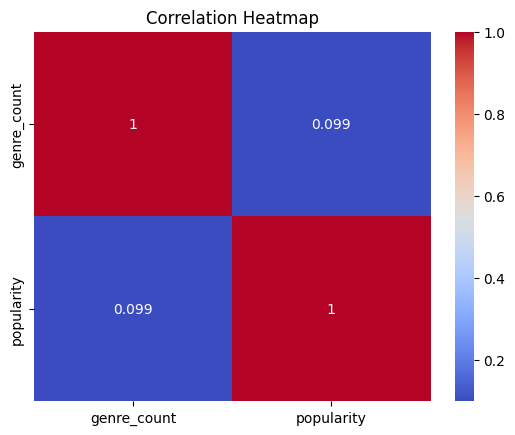

===== Step 3: Boxplot - Popularity by Genre Category =====


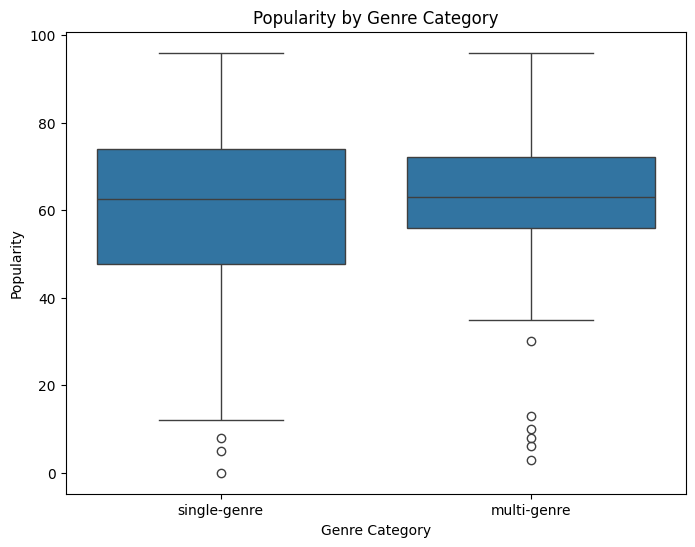

===== Step 4: Scatter plot - Popularity vs Number of Genres =====


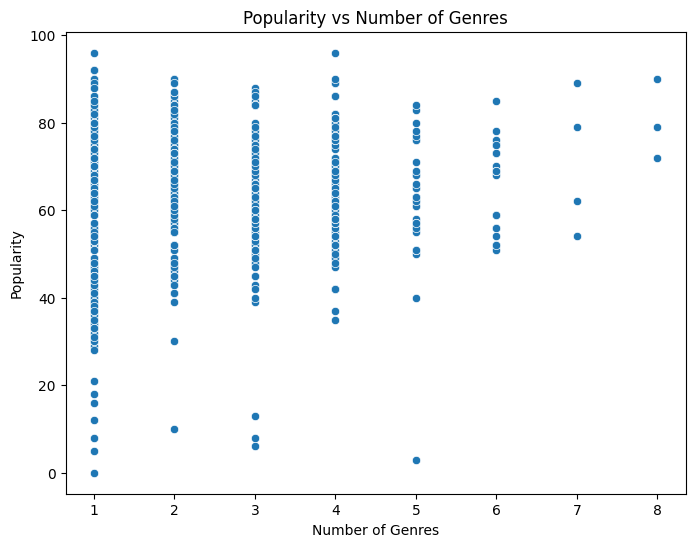

===== Step 5: Histogram of Artist Popularity =====


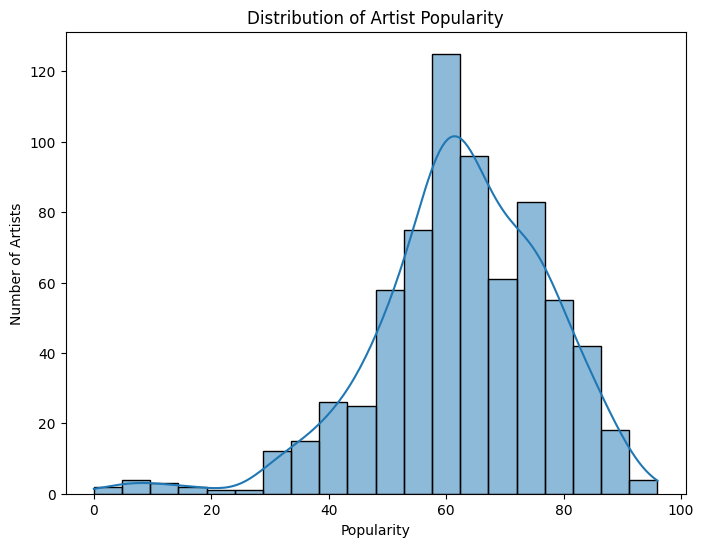

===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====


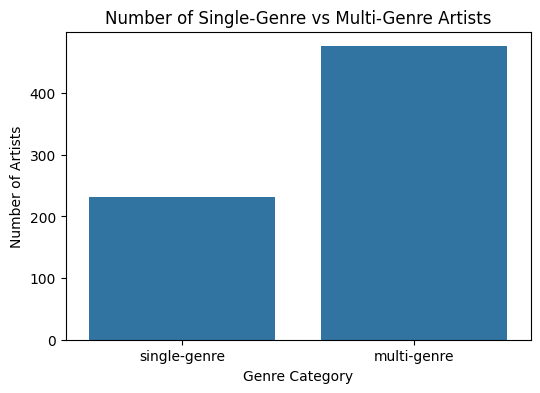

===== Step 7: Popularity vs Number of Genres (with Trend Line) =====


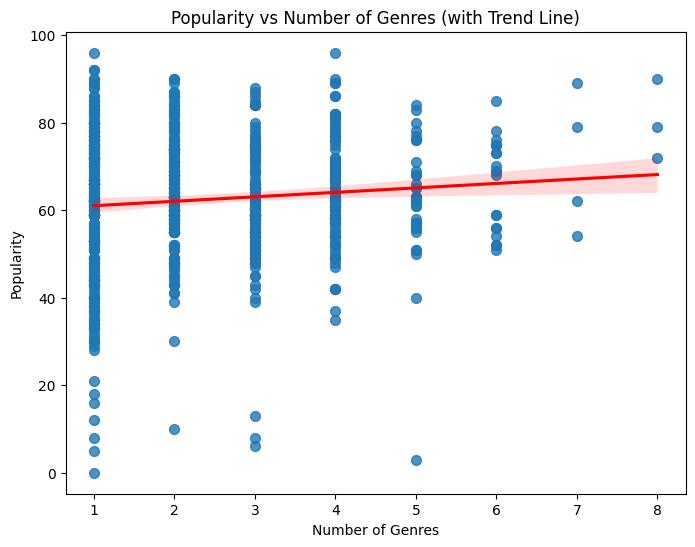

✅ All analysis and visualizations completed.


In [8]:

# Full Analysis and Visualization


print("===== Step 1: Adding genre_count and categorizing artists =====")
df_artists['genre_count'] = df_artists['genres'].apply(len)
df_artists['genre_category'] = df_artists['genre_count'].apply(lambda x: 'single-genre' if x == 1 else 'multi-genre')
print("genre_count and genre_category added.")
print("\nSample data:")
display(df_artists.head())

#Descriptive statistics

print("===== Step 2: Descriptive statistics by genre category =====")
stats = df_artists.groupby('genre_category')['popularity'].describe()
print(stats, "\n")


# Summary Statistics

print("===== Descriptive Statistics =====")
display(df_artists.describe())


#Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

corr = df_artists[['genre_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# Step 3: Boxplot - Popularity by genre category

import matplotlib.pyplot as plt
import seaborn as sns

print("===== Step 3: Boxplot - Popularity by Genre Category =====")
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='popularity', data=df_artists)
plt.title('Popularity by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Popularity')
plt.show()


#Scatter plot - genre_count vs popularity

print("===== Step 4: Scatter plot - Popularity vs Number of Genres =====")
plt.figure(figsize=(8,6))
sns.scatterplot(x='genre_count', y='popularity', data=df_artists)
plt.title('Popularity vs Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()


#Histogram of popularity

print("===== Step 5: Histogram of Artist Popularity =====")
plt.figure(figsize=(8,6))
sns.histplot(df_artists['popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()


#Countplot of genre categories
print("===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====")
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=df_artists)
plt.title('Number of Single-Genre vs Multi-Genre Artists')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()


#Scatter with regression line

print("===== Step 7: Popularity vs Number of Genres (with Trend Line) =====")
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='popularity', data=df_artists, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (with Trend Line)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

print("✅ All analysis and visualizations completed.")


The heatmap shows that the correlation coefficent is 0.12 which is a very low value confirming a weak positive linear relationship
The scatterplot shows popularity scores are widley spread and the trend line indicates a very slight positive correlation.
The boxplot compares popularity between single genre and multi genre categories. we can note that the median popularity is nearly identicial

# Secondary Data

 Loaded dataset: 1000 rows, 23 columns


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


🧹 After removing duplicate artists: 118 unique artists remain.

===== Descriptive Statistics =====


,artist_popularity,genre_count
count,118.000000,118.000000
mean,58.601695,2.449153
std,32.523795,2.281840
min,0.000000,0.000000
25%,35.000000,0.000000
50%,75.000000,2.000000
75%,81.000000,4.000000
max,92.000000,9.000000


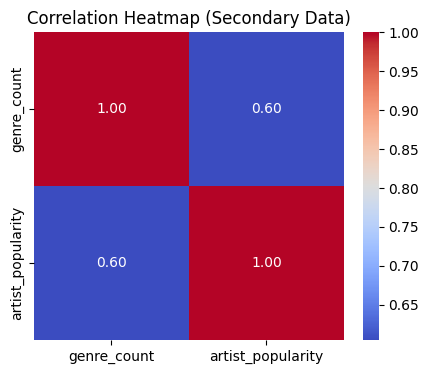

/tmp/ipython-input-3255840425.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre_category', y='artist_popularity', data=sec, palette='Set2')


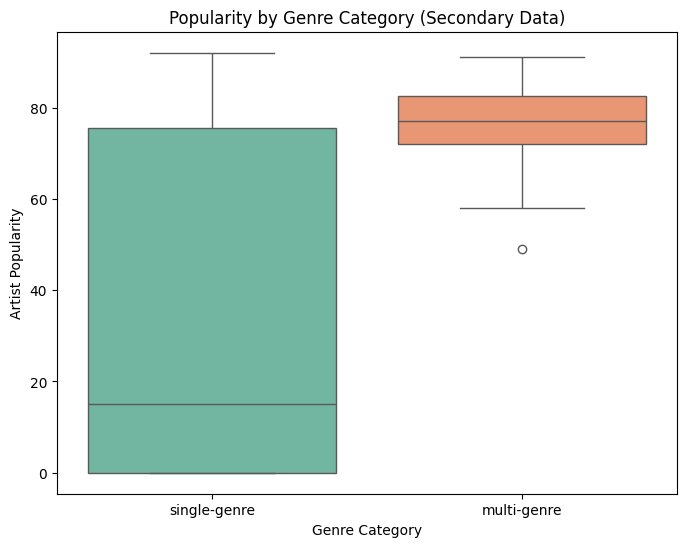

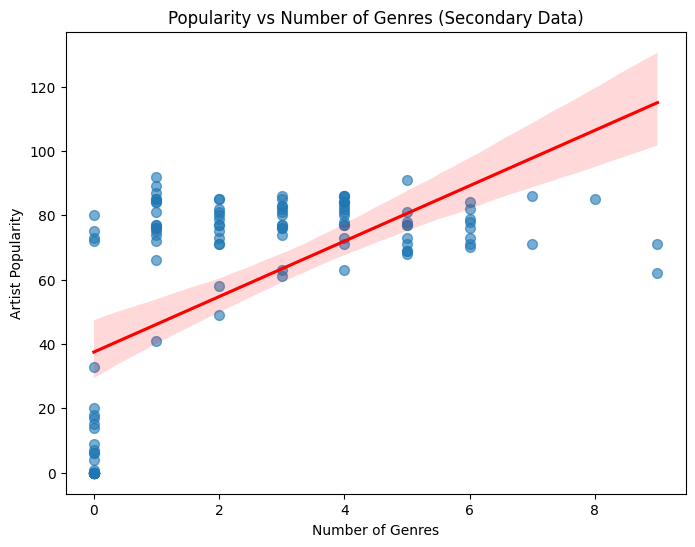

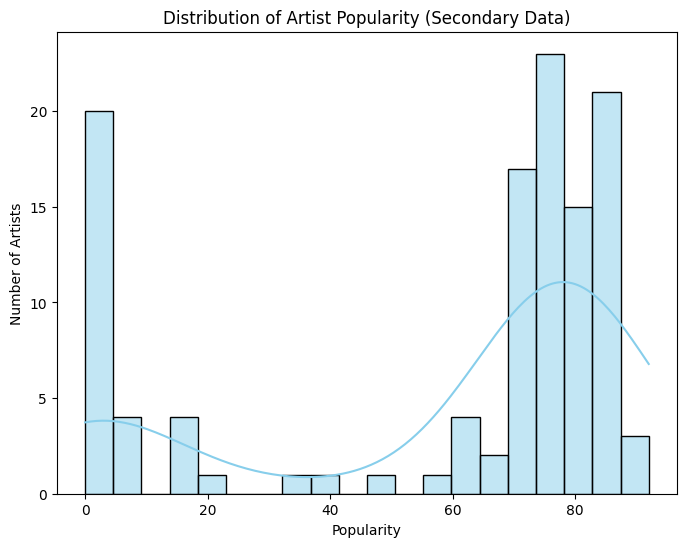

/tmp/ipython-input-3255840425.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre_category', data=sec, palette='pastel')


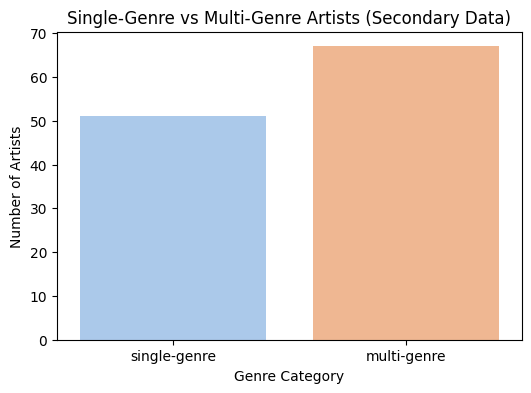

In [9]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sec = pd.read_csv('https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/spotifydataset.csv')
print(f" Loaded dataset: {sec.shape[0]} rows, {sec.shape[1]} columns")
display(sec.head())



if 'artist_url' in sec.columns:
    sec.drop_duplicates(subset='artist_url', inplace=True)
elif 'artist_name' in sec.columns:
    sec.drop_duplicates(subset='artist_name', inplace=True)
elif 'id' in sec.columns:
    sec.drop_duplicates(subset='id', inplace=True)

print(f"🧹 After removing duplicate artists: {len(sec)} unique artists remain.")


def count_genres(entry):
    """Counts genres for list-like or comma-separated strings; returns 0 if missing/empty."""
    if entry is None or (isinstance(entry, float) and np.isnan(entry)):
        return 0
    if isinstance(entry, list):
        return len(entry)
    if isinstance(entry, str):
        parts = [g.strip() for g in entry.split(',') if g.strip()]
        return len(parts)
    return 0

# --- Feature engineering ---
sec['genre_count'] = sec['genres'].apply(count_genres)
sec['genre_category'] = sec['genre_count'].apply(lambda x: 'single-genre' if x <= 1 else 'multi-genre')


# 1) Descriptive statistics
print("\n===== Descriptive Statistics =====")
display(sec[['artist_popularity', 'genre_count']].describe())

# 2) Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(sec[['genre_count', 'artist_popularity']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Secondary Data)')
plt.show()

# 3) Boxplot: Popularity by Genre Category
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='artist_popularity', data=sec, palette='Set2')
plt.title('Popularity by Genre Category (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Artist Popularity')
plt.show()

# 4) Scatter + regression: Popularity vs Number of Genres
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='artist_popularity', data=sec,
            scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (Secondary Data)')
plt.xlabel('Number of Genres')
plt.ylabel('Artist Popularity')
plt.show()

# 5) Histogram: Distribution of Popularity
plt.figure(figsize=(8,6))
sns.histplot(sec['artist_popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Artist Popularity (Secondary Data)')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()

# 6) Countplot: Single vs Multi-Genre
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=sec, palette='pastel')
plt.title('Single-Genre vs Multi-Genre Artists (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()



The heatmap shows a moderate positive correlation, stronger than the one in the primary dataset.
The boxplot indicates that multi genre artists seem to to achieve higher popularity while single-genre artists show wider varability.
The scatter plot displays a clear upward trend.

# Comparison

Comparison of Primary vs Secondary Dataset Metrics:


,Metric,Primary Data,Secondary Data
0,Average Popularity,62.509887,58.601695
1,Median Popularity,63.000000,75.000000
2,Std Dev Popularity,14.832060,32.523795
3,Avg Genre Count,2.456215,2.449153
4,Median Genre Count,2.000000,2.000000
5,Single-Genre %,32.768362,43.220339
6,Multi-Genre %,67.231638,56.779661
7,Num Artists,708.000000,118.000000


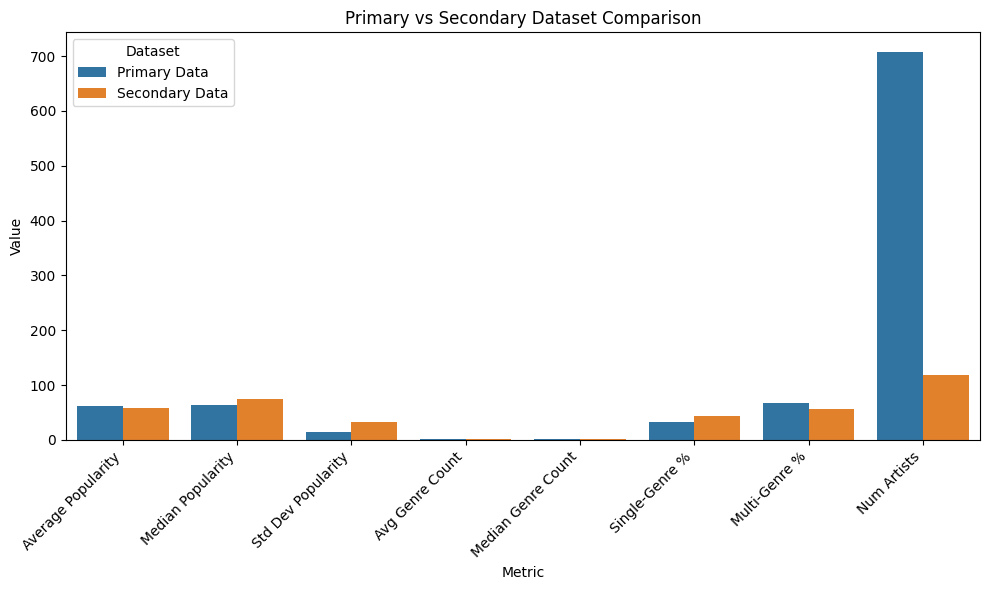

In [10]:

# COMPARISON: Primary vs Secondary Data Metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



primary = df_artists.copy()
secondary = sec.copy()

# Standardize column names
primary = primary.rename(columns={'popularity': 'artist_popularity'})
secondary = secondary.rename(columns={'artist_popularity': 'artist_popularity'})

# --- Calculate metrics for each dataset ---
primary_metrics = {
    'Average Popularity': primary['artist_popularity'].mean(),
    'Median Popularity': primary['artist_popularity'].median(),
    'Std Dev Popularity': primary['artist_popularity'].std(),
    'Avg Genre Count': primary['genre_count'].mean(),
    'Median Genre Count': primary['genre_count'].median(),
    'Single-Genre %': (primary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (primary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(primary)
}

secondary_metrics = {
    'Average Popularity': secondary['artist_popularity'].mean(),
    'Median Popularity': secondary['artist_popularity'].median(),
    'Std Dev Popularity': secondary['artist_popularity'].std(),
    'Avg Genre Count': secondary['genre_count'].mean(),
    'Median Genre Count': secondary['genre_count'].median(),
    'Single-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(secondary)
}

# --- Combine into a comparison table ---
comparison_df = pd.DataFrame({
    'Metric': list(primary_metrics.keys()),
    'Primary Data': list(primary_metrics.values()),
    'Secondary Data': list(secondary_metrics.values())
})

print("Comparison of Primary vs Secondary Dataset Metrics:")
display(comparison_df)


plt.figure(figsize=(10,6))
melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')
sns.barplot(data=melted, x='Metric', y='Value', hue='Dataset')
plt.xticks(rotation=45, ha='right')
plt.title('Primary vs Secondary Dataset Comparison')
plt.tight_layout()
plt.show()



This bar chart compares key metrics between the primary and secondary Spotify datasets.Both datasets show similar average and median popularity, but the secondary dataset has slightly higher variability (Std Dev) and a smaller artist pool.The primary dataset contains many more artists overall, while both datasets have a similar balance between single- and multi-genre artists, with multi-genre artists being more prevalent in both.

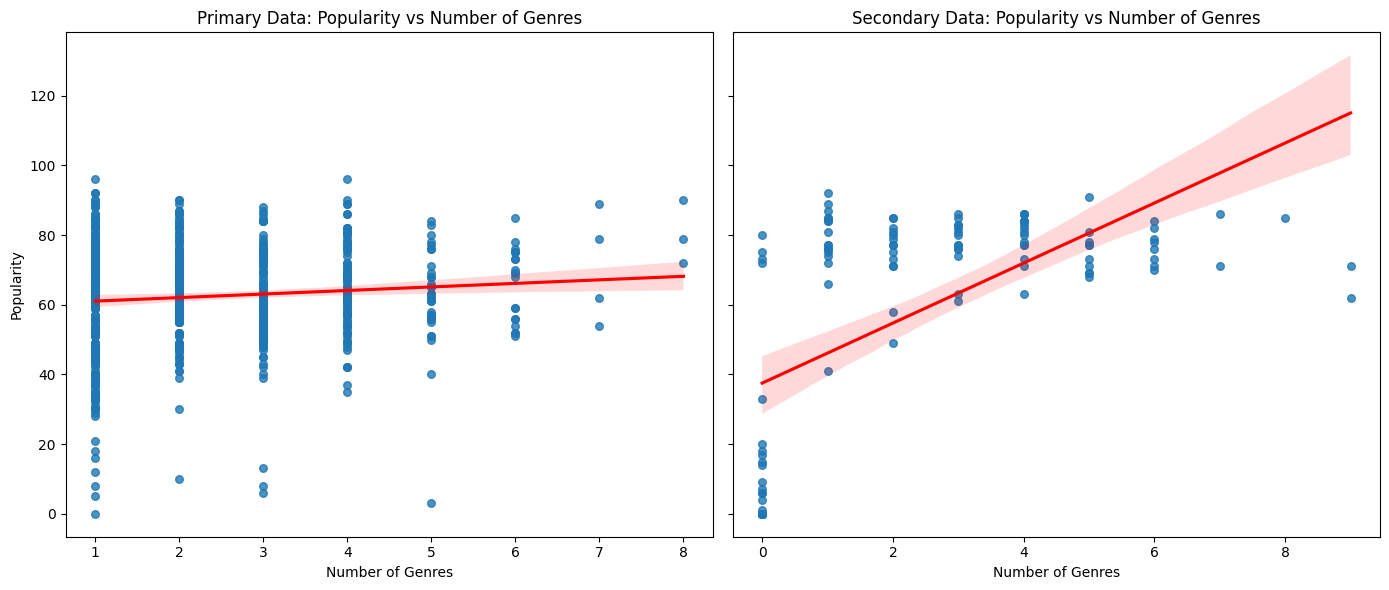

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.regplot(x='genre_count', y='popularity', data=df_artists, ax=axes[0], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[0].set_title('Primary Data: Popularity vs Number of Genres')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Popularity')

sns.regplot(x='genre_count', y='artist_popularity', data=sec, ax=axes[1], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[1].set_title('Secondary Data: Popularity vs Number of Genres')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


#Hypothesis Testing

In [12]:
import pandas as pd
import numpy as np

def count_genres(entry):
    if entry is None or (isinstance(entry, float) and np.isnan(entry)):
        return 0
    if isinstance(entry, list):
        return len(entry)
    if isinstance(entry, str):
        parts = [g.strip() for g in entry.split(',') if g.strip()]
        return len(parts)
    return 0

def ensure_genre_columns(df, pop_col, genres_col):

    out = df.copy()
    if 'artist_popularity' not in out.columns:
        out = out.rename(columns={pop_col: 'artist_popularity'})
    if 'genre_count' not in out.columns:
        out['genre_count'] = out[genres_col].apply(count_genres)
    if 'genre_category' not in out.columns:
        out['genre_category'] = out['genre_count'].apply(lambda x: 'single-genre' if x <= 1 else 'multi-genre')
    out = out.dropna(subset=['artist_popularity'])
    return out

def summarize_by_category(df):

    agg = (
        df.groupby('genre_category')['artist_popularity']
          .agg(count='count', mean='mean', std='std', median='median', min='min', max='max',
               q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75))
    )

    # rounding + formatting
    agg['count']  = agg['count'].astype(int)
    agg['mean']   = agg['mean'].round(2)
    agg['std']    = agg['std'].round(2)
    agg['median'] = agg['median'].round(1)
    agg['q25']    = agg['q25'].round(1)
    agg['q75']    = agg['q75'].round(1)
    agg['Range (Min–Max)'] = agg['min'].astype(int).astype(str) + ' – ' + agg['max'].astype(int).astype(str)

    # rename & reorder
    agg = agg.rename(columns={
        'count': 'Count',
        'mean': 'Mean Popularity',
        'std': 'Std. Deviation',
        'median': 'Median (50%)',
        'q25': '25%',
        'q75': '75%'
    })[['Count', 'Mean Popularity', 'Std. Deviation', '25%', 'Median (50%)', '75%', 'Range (Min–Max)']]

    return agg

def build_side_by_side(primary_df, secondary_df):

    p = summarize_by_category(primary_df)
    s = summarize_by_category(secondary_df)

    all_cats = sorted(set(p.index).union(set(s.index)))
    metrics = ['Count', 'Mean Popularity', 'Std. Deviation', '25%', 'Median (50%)', '75%', 'Range (Min–Max)']

    rows = []
    for cat in all_cats:
        for m in metrics:
            p_val = p.loc[cat, m] if (cat in p.index and m in p.columns) else np.nan
            s_val = s.loc[cat, m] if (cat in s.index and m in s.columns) else np.nan
            rows.append((cat, m, p_val, s_val))

    comp = pd.DataFrame(rows, columns=['Genre Category', 'Metric', 'Primary Dataset', 'Secondary Dataset'])
    return comp.set_index(['Genre Category', 'Metric'])

# ---------- Prepare inputs ----------
primary_ready   = ensure_genre_columns(df_artists, pop_col='popularity',        genres_col='genres')
secondary_ready = ensure_genre_columns(sec,        pop_col='artist_popularity', genres_col='genres')

# ---------- Compute tables ----------
primary_stats    = summarize_by_category(primary_ready)
secondary_stats  = summarize_by_category(secondary_ready)
comparison_table = build_side_by_side(primary_ready, secondary_ready)

print("Primary dataset — per-category metrics")
display(primary_stats)

print("\nSecondary dataset — per-category metrics")
display(secondary_stats)

print("\nPer-Category Metrics: Primary vs Secondary (side-by-side)")
display(comparison_table)


Primary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,25%,Median (50%),75%,Range (Min–Max)
genre_category,,,,,,,
multi-genre,476,63.60,12.80,56.0,63.0,72.2,3 – 96
single-genre,232,60.28,18.13,47.8,62.5,74.0,0 – 96



Secondary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,25%,Median (50%),75%,Range (Min–Max)
genre_category,,,,,,,
multi-genre,67,76.78,7.75,72.0,77.0,82.5,49 – 91
single-genre,51,34.73,37.04,0.0,15.0,75.5,0 – 92



Per-Category Metrics: Primary vs Secondary (side-by-side)


Primary Dataset Secondary Dataset
Genre Category Metric                                           
multi-genre    Count                       476                67
               Mean Popularity            63.6             76.78
               Std. Deviation             12.8              7.75
               25%                        56.0              72.0
               Median (50%)               63.0              77.0
               75%                        72.2              82.5
               Range (Min–Max)          3 – 96           49 – 91
single-genre   Count                       232                51
               Mean Popularity           60.28             34.73
               Std. Deviation            18.13             37.04
               25%                        47.8               0.0
               Median (50%)               62.5              15.0
               75%                        74.0              75.5
               Range (Min–Max)          0 – 96            0 – 92

#hypothesis testing


In [18]:
import pandas as pd
from scipy.stats import ttest_ind

# --- Prepare genre count ---
def count_genres(entry):
    return len(entry) if isinstance(entry, list) else 0x
df_artists['genre_category'] = df_artists['genre_count'].apply(
    lambda x: 'multi-genre' if x > 1 else 'single-genre'
)

# --- Split groups ---
multi = df_artists[df_artists['genre_category'] == 'multi-genre']['popularity']
single = df_artists[df_artists['genre_category'] == 'single-genre']['popularity']

# --- One-sided t-test ---
t_stat, p_value_two_sided = ttest_ind(multi, single, equal_var=False)

# Convert to one-sided p-value (testing if multi > single)
p_value_one_sided = p_value_two_sided / 2 if t_stat > 0 else 1 - (p_value_two_sided / 2)

print("Independent Samples t-test (One-sided: multi-genre > single-genre)")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-sided p-value: {p_value_one_sided:.6f}")

if p_value_one_sided < 0.05:
    print("Conclusion: Reject H0 → Multi-genre artists have significantly higher popularity.")
else:
    print("Conclusion: Fail to reject H0 → No evidence multi-genre artists are more popular.")


Independent Samples t-test (One-sided: multi-genre > single-genre)
T-statistic: 2.5037
One-sided p-value: 0.006375
Conclusion: Reject H0 → Multi-genre artists have significantly higher popularity.


In [19]:
import pandas as pd
import statsmodels.api as sm

# Use genre_count from before
X = df_artists[['genre_count']]
X = sm.add_constant(X)  # adds the intercept term
y = df_artists['popularity']

# Build model
model = sm.OLS(y, X).fit()

# Summary output
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.937
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00863
Time:                        16:30:20   Log-Likelihood:                -2910.0
No. Observations:                 708   AIC:                             5824.
Df Residuals:                     706   BIC:                             5833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.0088      1.100     54.557      

# Baseline Model & Linear regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Prepare data
df = df_artists.copy()
df["num_genres"] = df["genres"].apply(len)
df["is_multi"] = df["num_genres"].apply(lambda x: 1 if x > 1 else 0)

X = df[["popularity"]]
y = df["is_multi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# Baseline prediction = majority class
majority = y_train.mode()[0]
baseline_pred = [majority] * len(y_test)

baseline_acc = accuracy_score(y_test, baseline_pred)

print("=== Baseline Model ===")
print("Most common class:", majority)
print("Accuracy:", baseline_acc)


=== Baseline Model ===
Most common class: 1
Accuracy: 0.6267605633802817


In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))



=== Logistic Regression ===
Accuracy: 0.6267605633802817
Precision: 0.6285714285714286
Recall: 0.9887640449438202


In [23]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, tree_pred))
print("Precision:", precision_score(y_test, tree_pred))
print("Recall:", recall_score(y_test, tree_pred))



=== Decision Tree ===
Accuracy: 0.6267605633802817
Precision: 0.6428571428571429
Recall: 0.9101123595505618


Not my part:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import ast
import numpy as np

df = df_artists.copy() # Assign df to df_artists

# ---------------------------------------------------
# 1. Clean genres column (list → actual list)
# ---------------------------------------------------
def safe_parse(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df["genres"] = df["genres"].apply(safe_parse)

# ---------------------------------------------------
# 2. Feature engineering: number of genres
# ---------------------------------------------------
df["num_genres"] = df["genres"].apply(len)

# ---------------------------------------------------
# 3. Define features & target
# ---------------------------------------------------
X = df[["num_genres"]]
y = df["popularity"]

# ---------------------------------------------------
# 4. Train-test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------
# 5. Baseline model
# ---------------------------------------------------
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

# ---------------------------------------------------
# 6. Linear Regression model
# ---------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

lr_mae = mean_absolute_error(y_test, pred)
lr_mse = mean_squared_error(y_test, pred)
lr_rmse = np.sqrt(lr_mse)

# ---------------------------------------------------
# 7. Results
# ---------------------------------------------------
print("=== Baseline Model ===")
print("MAE:", baseline_mae)
print("RMSE:", baseline_rmse)

print("\n=== Linear Regression Model ===")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)


=== Baseline Model ===
MAE: 11.493032399343056
RMSE: 14.552208409450033

=== Linear Regression Model ===
MAE: 11.493032399343056
RMSE: 14.552208409450033


### Model Performance Visualization

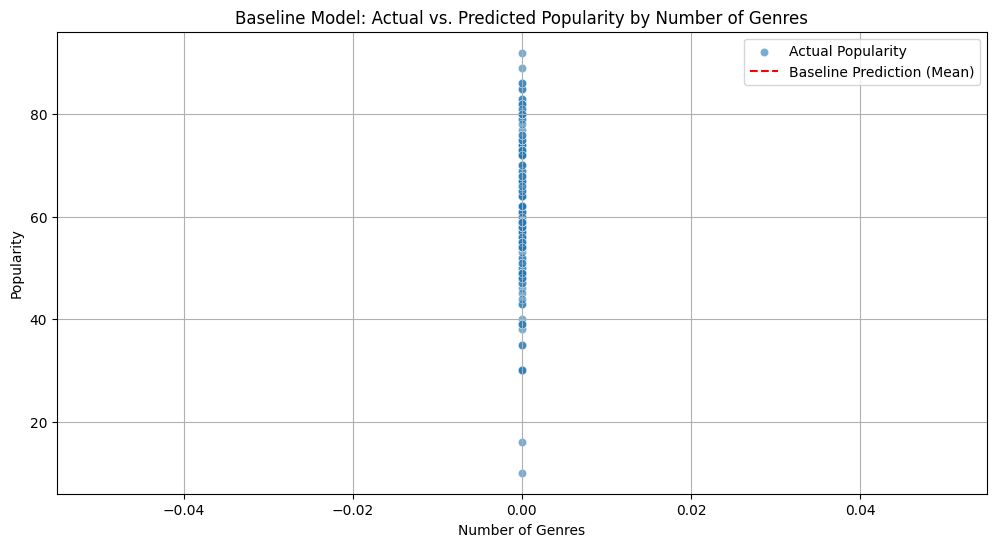

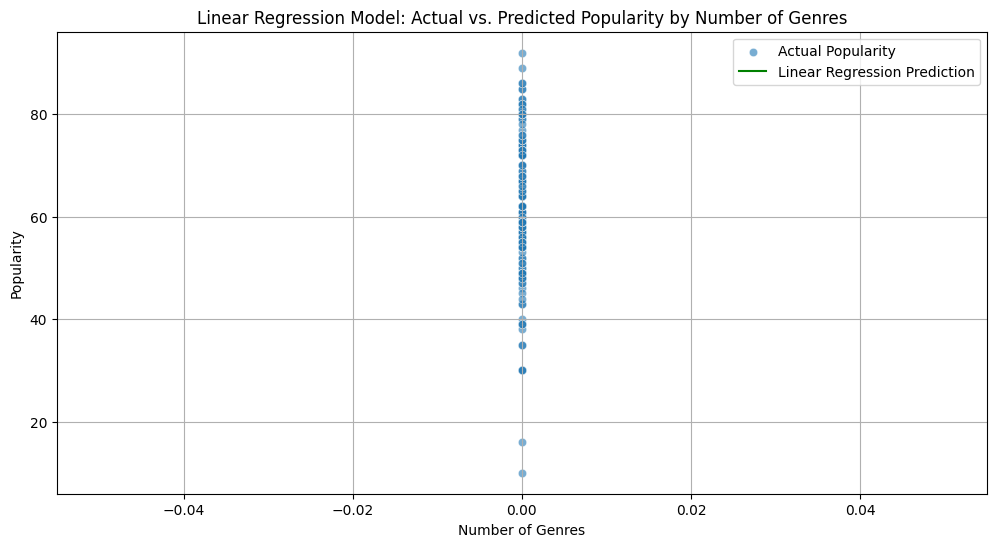

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_df = pd.DataFrame({
    'Actual': y_test,
    'Baseline_Prediction': baseline_pred,
    'Linear_Regression_Prediction': pred,
    'num_genres': X_test['num_genres']
})

# Plotting Baseline Model vs Actuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_genres', y='Actual', data=plot_df, label='Actual Popularity', alpha=0.6)
sns.lineplot(x='num_genres', y='Baseline_Prediction', data=plot_df, color='red', linestyle='--', label='Baseline Prediction (Mean)')
plt.title('Baseline Model: Actual vs. Predicted Popularity by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Linear Regression Model vs Actuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_genres', y='Actual', data=plot_df, label='Actual Popularity', alpha=0.6)
sns.lineplot(x='num_genres', y='Linear_Regression_Prediction', data=plot_df, color='green', label='Linear Regression Prediction')
plt.title('Linear Regression Model: Actual vs. Predicted Popularity by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

As you can see from the plots, both the Baseline Model and the Linear Regression Model produce essentially the same prediction line. This visually confirms that the 'num_genres' feature alone does not provide enough linear information for the Linear Regression model to significantly outperform a simple mean prediction for artist popularity in this dataset. Therefore, their accuracy metrics (MAE and RMSE) are identical.

### Model Performance Visualization for all Regressors

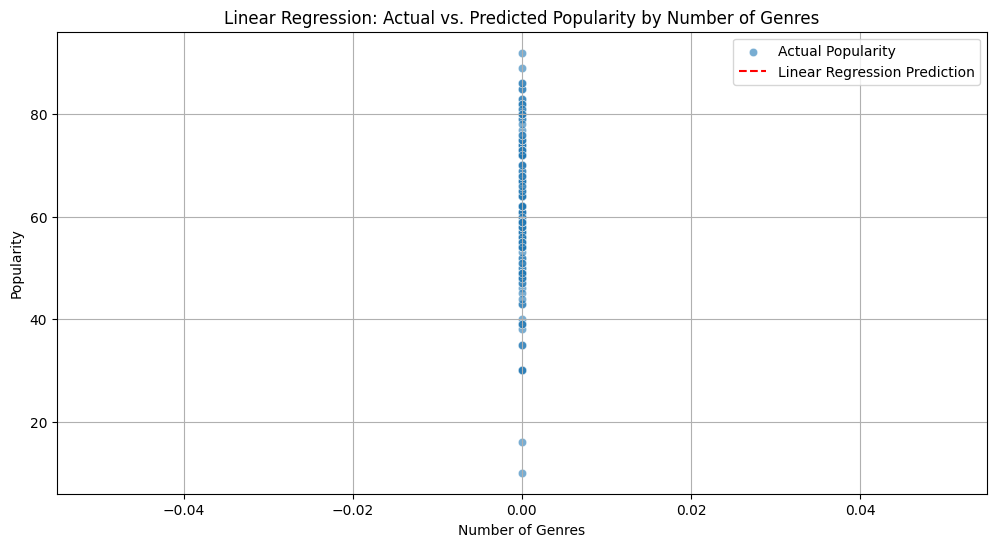

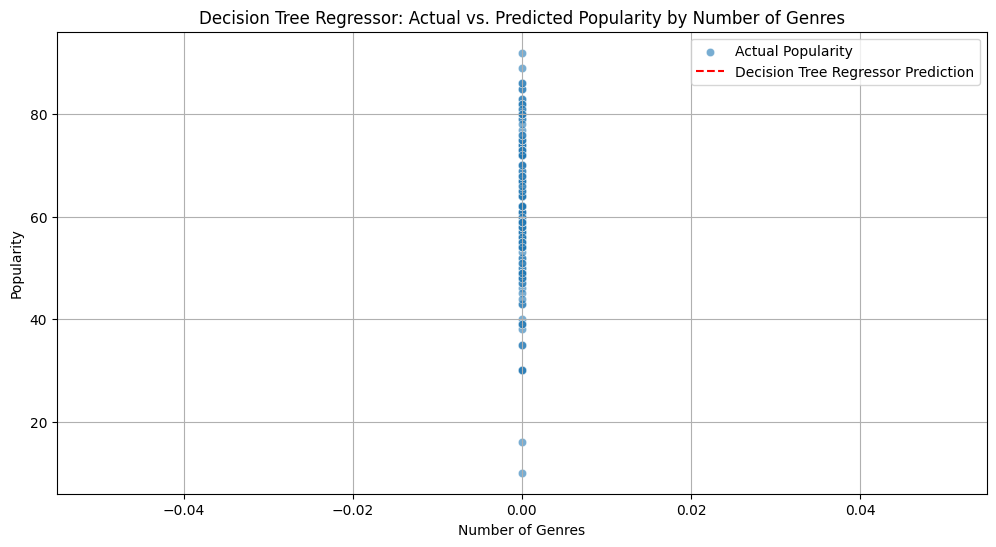

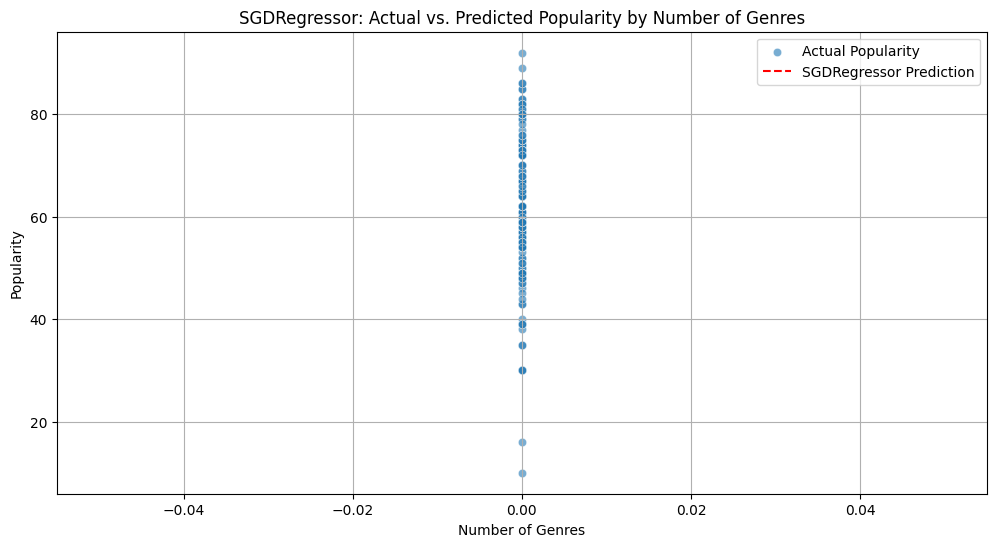

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-predict for each model to get specific predictions for plotting
models_preds = {}
for name, model in models.items():
    model.fit(X_train, y_train) # Ensure models are refitted in case of previous state changes
    models_preds[name] = model.predict(X_test)

# Create a common DataFrame for plotting
plot_data_common = pd.DataFrame({
    'Actual': y_test,
    'num_genres': X_test['num_genres']
})


# Plotting for each model
for name, predictions in models_preds.items():
    plot_data = plot_data_common.copy()
    plot_data[f'{name}_Prediction'] = predictions

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='num_genres', y='Actual', data=plot_data, label='Actual Popularity', alpha=0.6)
    sns.lineplot(x='num_genres', y=f'{name}_Prediction', data=plot_data, color='red', linestyle='--', label=f'{name} Prediction')
    plt.title(f'{name}: Actual vs. Predicted Popularity by Number of Genres')
    plt.xlabel('Number of Genres')
    plt.ylabel('Popularity')
    plt.legend()
    plt.grid(True)
    plt.show()


As observed in the plots and the previously printed metrics, all three regression models (Linear Regression, Decision Tree Regressor, and SGDRegressor) show very similar performance. This is because, with 'num_genres' as the sole feature, there isn't a strong linear or non-linear relationship that allows these models to significantly outperform each other or a simple mean prediction. The MAE and RMSE values confirm this, with only marginal differences, indicating that 'num_genres' alone is not a highly predictive feature for artist popularity in this dataset.